In [47]:
# Define Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
#load file
df=pd.read_csv("food_coded.csv")
df.head(5)

#print(X.columns)
#print(y.columns)
#print(y.head(5))


# Simplying data due to low training data avaialble
    # Removing 2,6,7 categroy due to low count
    # Adding 8 to 4 because indian food also comes under the umbrella of Asian food
    # Removing 0 because they are undecided and have low counts

print(df.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())

df.loc[df['fav_cuisine_coded']==8] = 4
df=df[df['fav_cuisine_coded'].isin([1,2,4,5])]

print(df.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())

# Split it into input features and output 




fav_cuisine_coded
0     6
1    59
2    15
3     2
4    22
5    15
6     1
7     1
8     4
Name: fav_cuisine_coded, dtype: int64
fav_cuisine_coded
1    59
2    15
4    26
5    15
Name: fav_cuisine_coded, dtype: int64


In [49]:

#for (i,names) in enumerate(df.columns):
    #print (i," : ",names)
df_sel = df.iloc[:,[26,4,6,10,15,19,20,21,22,30,33,37,45,47,48,57,58,38,39,32,49]]
print(df_sel.columns)
print(df_sel.head(5))

Index(['fav_cuisine_coded', 'calories_day', 'coffee', 'cook', 'drink',
       'eating_out', 'employment', 'ethnic_food', 'exercise', 'fruit_day',
       'healthy_feeling', 'income', 'nutritional_check', 'parents_cook',
       'pay_meal_out', 'veggies_day', 'vitamins', 'indian_food',
       'italian_food', 'greek_food', 'persian_food'],
      dtype='object')
   fav_cuisine_coded  calories_day  coffee  cook  drink  eating_out  \
1                  1           3.0       2   3.0    2.0           2   
2                  1           4.0       2   1.0    1.0           2   
4                  1           2.0       2   1.0    2.0           2   
6                  4           3.0       2   2.0    1.0           2   
7                  5           3.0       1   3.0    2.0           2   

   employment  ethnic_food  exercise  fruit_day  ...  income  \
1         2.0            4       1.0          4  ...     4.0   
2         3.0            5       2.0          5  ...     6.0   
4         2.0        

In [50]:
#data cleaning


    # Taqi code will come here, i am just getting the column as it is 
    
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df_sel)
X = imputer.transform(df_sel)
df_sel_clean = pd.DataFrame(X,columns = df_sel.columns)


In [51]:
#standardization

    # This will be done once data is cleaned

In [52]:
# Data Exploration
    # scatter plots
    # histograms
    # Box plot 
    # Line chart etc

# Just put whatever you think is related to our model. 


In [53]:
def correlation_matrix(df_1):
    from matplotlib.colors import ListedColormap
    
    corrMatrix = df.corr()
    fig, ax = plt.subplots(figsize=(30,30))
    #sns.heatmap(corrMatrix,cmap=ListedColormap(['green','green', 'yellow','red', 'red']), annot=True,linewidths=.5, ax=ax)
    sns.heatmap(corrMatrix, annot=True,linewidths=.5, ax=ax)   
    plt.show()

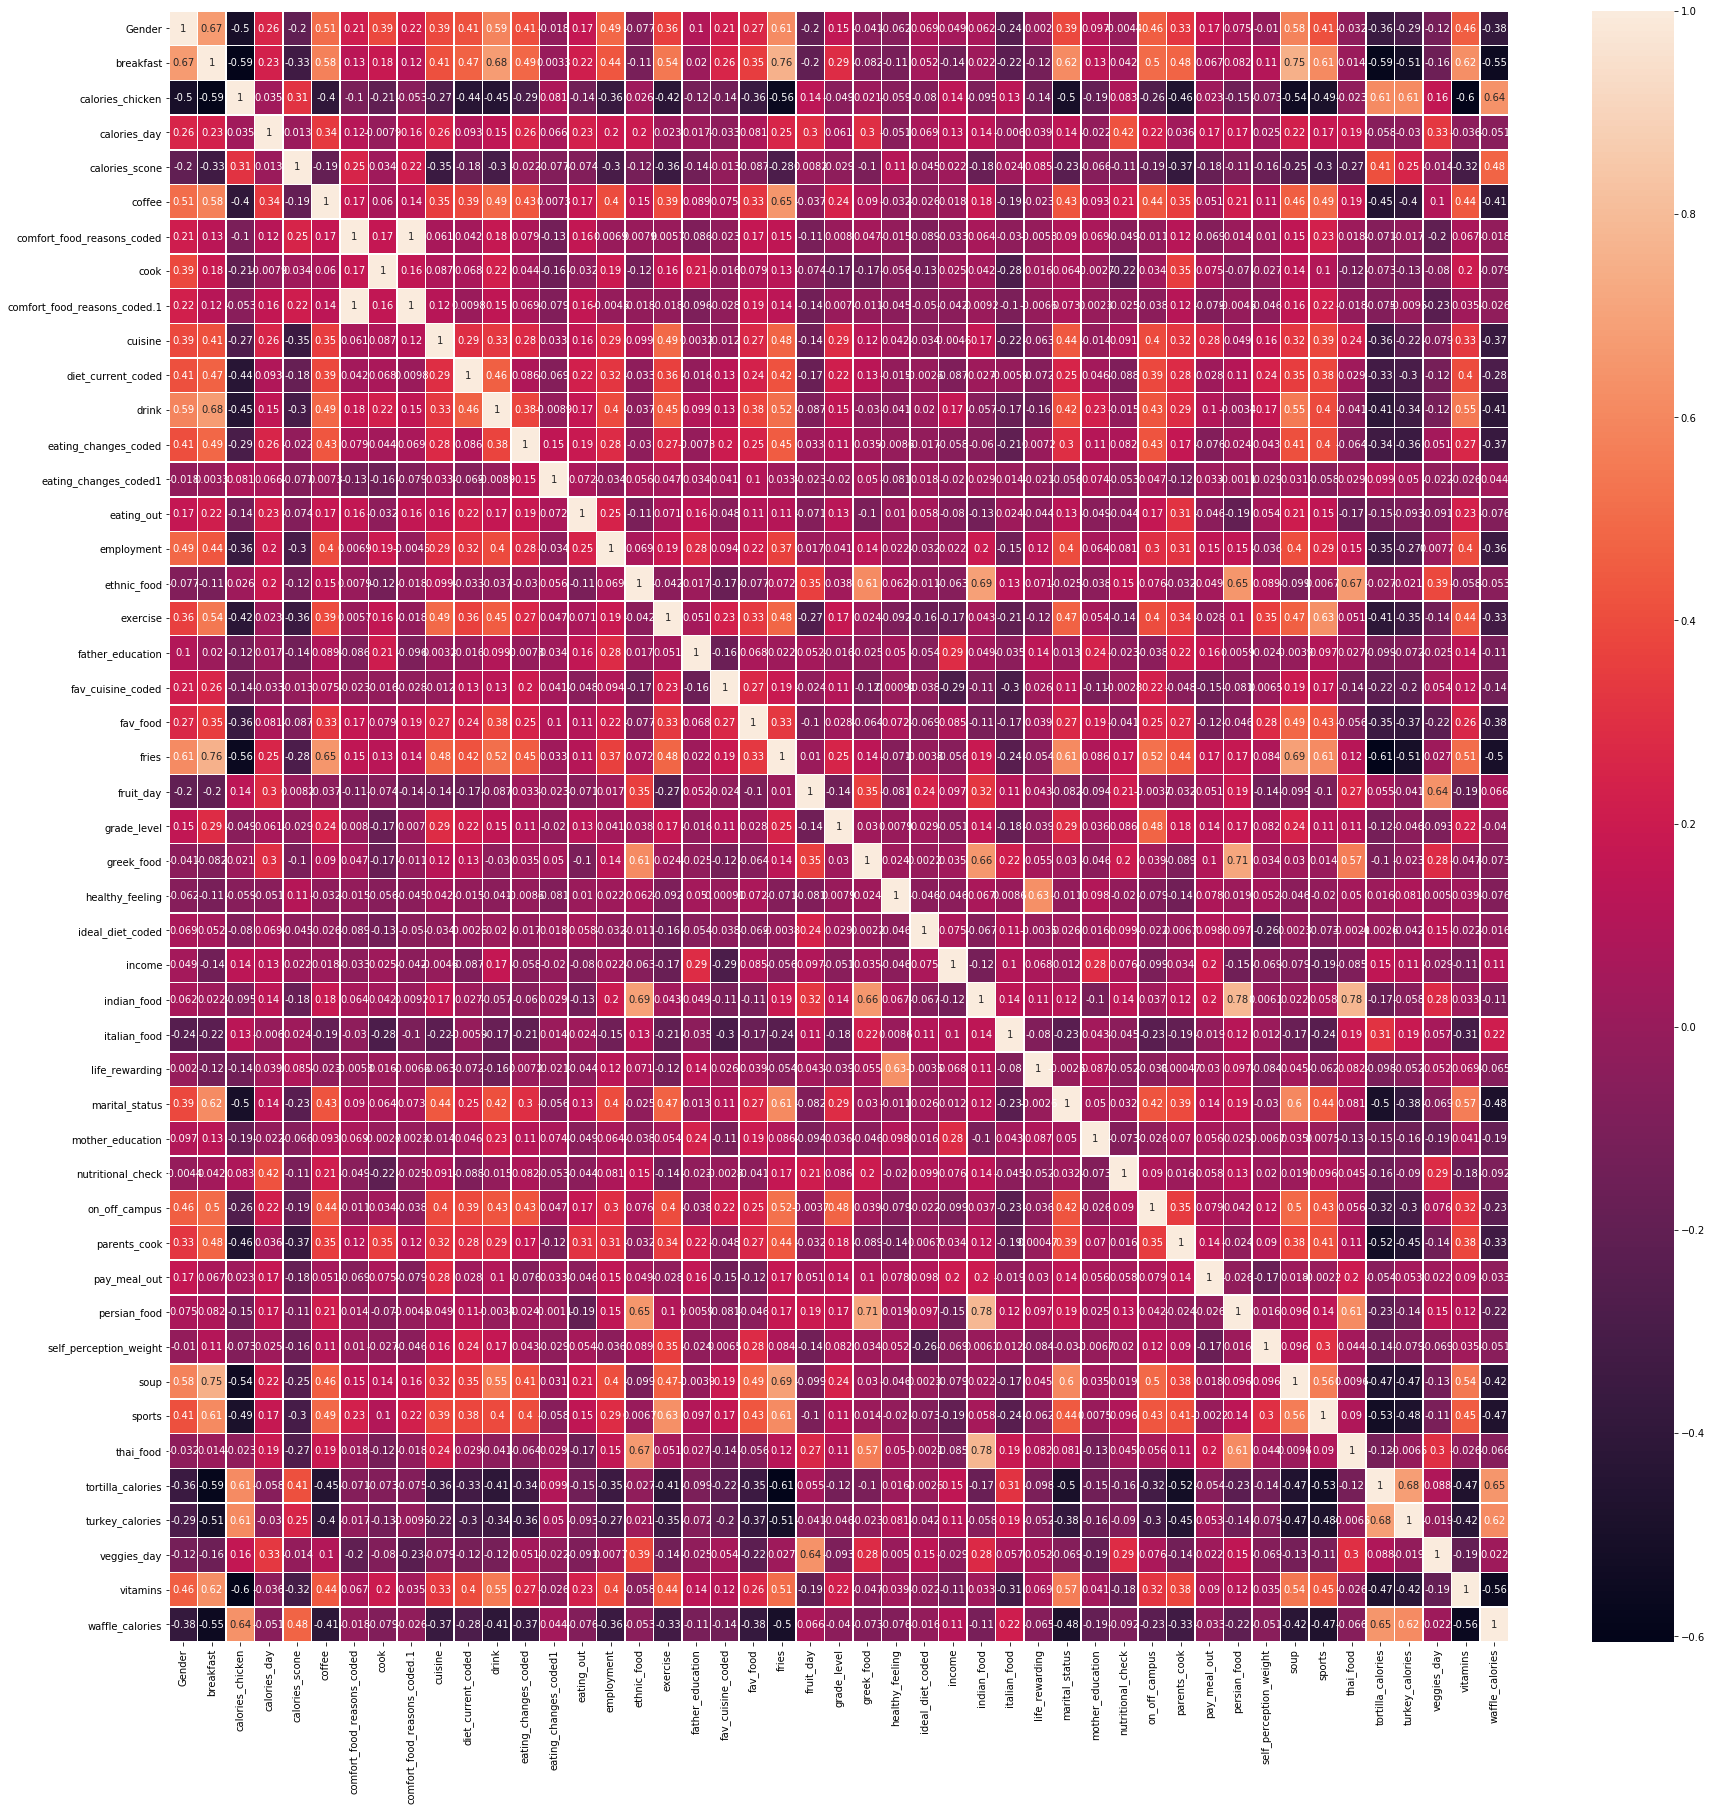

In [54]:
correlation_matrix(df_sel_clean)

In [55]:
def chi_square_feature_sel(df_1, dep_col_name,total_col_selected):
    df_train_chi_ind = df_1.loc[:, df_1.columns != dep_col_name]
    df_train_chi_dep = df_1.iloc[:,df_1.columns == dep_col_name]
    
    #rint(df_train_chi_dep.head(5))
    #rint(df_train_chi_ind.head(5))
      
    
    bestfeatures = SelectKBest(score_func=chi2, k=20)
    fit = bestfeatures.fit(df_train_chi_ind,df_train_chi_dep)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(df_train_chi_ind.columns)
    
    #concat two dataframes for better visualization 
    
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    #print(featureScores.nlargest(20,'Score'))  #print 10 best features
    
    top_n_columns = featureScores.sort_values('Score',ascending=False).head(total_col_selected).Specs
    return top_n_columns

In [56]:
#feature selection
    # Chi-square (categorical variables)
    # Random Forest (overall)
    # Correlation (numerical variables)
    # use lasso as well 
# join multiple features


# Important step , need to iterate over and over to find suitable features

# Currently i am just hand-picking the features and then applying chi-square test and correlation to get top features 

top_n_cols = chi_square_feature_sel(df_sel_clean,'fav_cuisine_coded',10)
top_n_cols=list(top_n_cols)
top_n_cols.append('fav_cuisine_coded')

df_sel_features =  df_sel_clean[df_sel_clean.columns.intersection(top_n_cols)]

print(df_sel_features.columns)


Index(['fav_cuisine_coded', 'coffee', 'ethnic_food', 'exercise',
       'healthy_feeling', 'income', 'nutritional_check', 'parents_cook',
       'indian_food', 'greek_food', 'persian_food'],
      dtype='object')


In [57]:
#test-train split using stratification

# STRATIFIED SAMPLING 
X = df_sel_features.loc[:, df_sel_features.columns != 'fav_cuisine_coded']
y = df_sel_features[['fav_cuisine_coded']]

print (X)
print (y)

X_train, tempX_test, y_train, tempY_test = train_test_split(X, y,stratify=y,test_size=0.30)
x_val, x_test, y_val, y_test = train_test_split(tempX_test, tempY_test,stratify=tempY_test,test_size=0.64)

# Training Set : X_train, y_train
# Validation Set : x_val ,  y_val
# Testing Set : x_test , y_test


print(y_train.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
print(y_test.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
print(y_val.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
print(X_train.head(2))

     coffee  ethnic_food  exercise  healthy_feeling  income  \
0       2.0          4.0       1.0              5.0     4.0   
1       2.0          5.0       2.0              6.0     6.0   
2       2.0          4.0       1.0              6.0     6.0   
3       2.0          5.0       1.0              4.0     4.0   
4       1.0          2.0       2.0              3.0     5.0   
..      ...          ...       ...              ...     ...   
110     2.0          4.0       2.0              5.0     4.0   
111     2.0          3.0       2.0              5.0     2.0   
112     1.0          5.0       2.0              6.0     2.0   
113     1.0          2.0       1.0              1.0     4.0   
114     2.0          3.0       2.0              3.0     5.0   

     nutritional_check  parents_cook  indian_food  greek_food  persian_food  
0                  4.0           1.0          4.0         4.0           4.0  
1                  4.0           1.0          5.0         5.0           5.0  
2        

In [58]:
#model implementation
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

c_est = softmax_reg.predict(x_val)
probs = softmax_reg.predict_proba(x_val)
print(c_est)

#Shape Error here, Talha. Needs to be seen
from sklearn.metrics import accuracy_score

accuracy_score(y_val, c_est)


c_est = softmax_reg.predict(x_test)
accuracy_score(y_test, c_est)

[5. 1. 1. 1. 1. 4. 4. 1. 4. 1. 1. 5.]


0.391304347826087

In [59]:
#test-train split using StratifiedKFold that also shuffles the data
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

X = df_sel_features.loc[:, df_sel_features.columns != 'fav_cuisine_coded']
y = df_sel_features[['fav_cuisine_coded']]

cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(X,y):
    print(train)

[ 19  20  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  21  22  23  25  43  44  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  45  46  47  66  67  69  72  73  74  75  76
  77  78  79  80  81  82  83  8

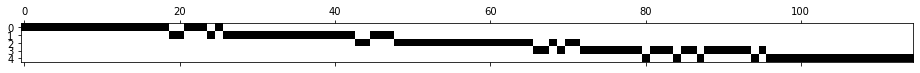

In [60]:
#Function for visualization of K-fold Stratified Sampling with 5 splits

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')
    
plot_cv(StratifiedKFold(n_splits=5),X,y)

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(softmax_reg, X, y, cv=cv)
print(scores)
print("Mean:", np.mean(scores.mean()))
print("Standard deviation:", np.mean(scores.std()))

[0.43478261 0.43478261 0.56521739 0.43478261 0.43478261]
Mean: 0.4608695652173913
Standard deviation: 0.05217391304347825


In [70]:
#Grid search for finding right hyperparameter for Multinomial and One vs All Regression

from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7),"multi_class":["multinomial","ovr",], "penalty":["l1","l2"], "solver":["lbfgs","saga","newton-cg"]} # l1 lasso l2 ridge
logreg=LogisticRegression(max_iter= 1000, random_state=42)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print(logreg_cv.score(X_train, y_train))
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

0.6125
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'saga'}
accuracy : 0.575


In [66]:
# Applying Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)

gb_est = grad_boost.predict(x_test)
accuracy_score(y_test, gb_est)

0.391304347826087

In [67]:
# Applying AdaBoosting Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)


ab_est = ada_boost.predict(x_test)
accuracy_score(y_test, ab_est)

0.4782608695652174

In [69]:
#Grid search for finding right hyperparameter for Gradient Boost Classification

from sklearn.model_selection import GridSearchCV

# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10]
#     }

#Using a subset of parameters for early computation, more parameters could be added from above sample

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=10)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

0.7
tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}
accuracy : 0.575


In [75]:
#Grid search for finding right hyperparameter for Gradient Boost Classification

from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "n_estimators":[10, 20, 30, 40 ,50]
    }

clf = GridSearchCV(AdaBoostClassifier(random_state=42, scoring='accuracy'), parameters, cv=10)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

0.55
tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'n_estimators': 30}
accuracy : 0.55


In [89]:
#Ensemble learning implementation, comparing Logistic Regression (Multinomial), Gradient and Ada-Boost 

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

voting_clf = VotingClassifier(estimators=[('LRM', softmax_reg), ('GDB', grad_boost), ('ADB', ada_boost)], voting='soft')
voting_clf.fit(X_train, y_train)

preds = voting_clf.predict(x_test)
acc = accuracy_score(y_test, preds)


print("Accuracy is: " + str(acc))

Accuracy is: 0.4782608695652174


In [ ]:
#Evaluation function & Thresholding
    # Loop through thresholds to get best performance
    # If implementing One vs ALl , use baseline performance and compare it with other.
    # Precision, Recall, Accuracy, ROC curve, F1 score
    # Bin Sampling 
    # Lift measure
    # Migth use R^2 , not sure

In [ ]:
# Final hold-out sample testing

In [ ]:
# If it is underperforming 
    #use other model lile (Logistic Regression{One vs All}) <- Try this definitely (Done in Grid Search)
    # Change feature selection method
    # Use l1 unstead of l2 or reduce L2 penalty
    
# If it is overperforming
    # use strict l2
    # go back to simple one vs all model
